<a href="https://colab.research.google.com/github/tentenvi/IIS/blob/main/Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Лабораторная работа 1



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

Данные для Варианта №143

In [2]:
data = np.array([
    [12.90071446,11.25056894],
    [ 2.38763095, 4.86681461],
    [11.83681661,12.28660441],
    [ 7.50737517, 1.06576571],
    [ 4.08580922, 4.78064542],
    [ 1.09399723, 5.03292521],
    [12.65343081,11.708073 ],
    [ 6.82449503, 0.47521531],
    [ 6.82692261, 0.80649849],
    [13.08619564,11.02483022],
    [ 7.08047464, 2.55530745],
    [13.50471679,11.7227253 ],
    [12.8554885 ,11.16945532],
    [ 7.00066921, 1.40629603],
    [13.36014799,10.96009619],
    [ 2.43464571, 4.69484707],
    [ 1.57716809, 4.92378419],
    [ 2.49432897, 5.45448041],
    [ 3.06208336, 5.65977412],
    [11.95884194,12.3740558 ],
    [ 2.45847918, 4.49012526],
    [ 7.39179898, 1.62192209],
    [12.71663783,12.12309712],
    [12.18027739,11.85708941],
    [ 7.04010647, 1.87510296],
    [ 1.90715501, 5.33630012],
    [ 7.79032475, 1.82900814],
    [ 0.93297234, 4.5278383 ],
    [ 6.8947669 , 1.27858517],
    [ 3.44472118, 5.42506946],
    [12.50835076, 9.40749308],
    [ 7.12029299, 1.87431821],
    [ 7.59577936, 1.87266378]
])

Метод локтя для нахождения оптимального количества кластеров

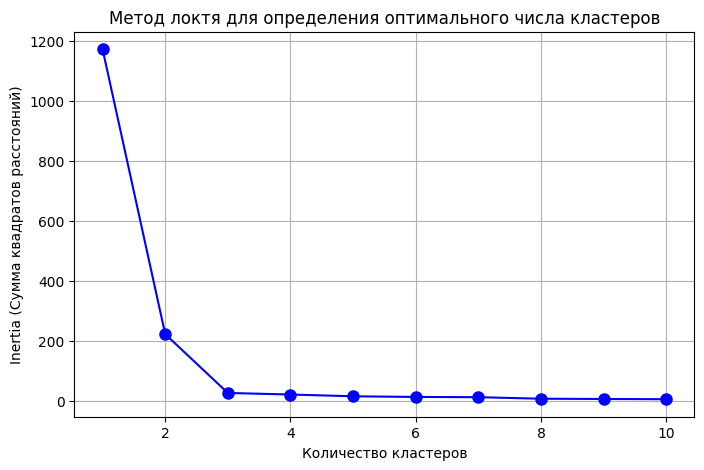

In [3]:
def plot_elbow_method(data):
    inertias = []
    K_range = range(1, 11)

    for k in K_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        inertias.append(kmeans.inertia_)

    plt.figure(figsize=(8, 5))
    plt.plot(K_range, inertias, 'bo-', markersize=8)
    plt.xlabel('Количество кластеров')
    plt.ylabel('Inertia (Сумма квадратов расстояний)')
    plt.title('Метод локтя для определения оптимального числа кластеров')
    plt.grid(True)
    plt.show()

plot_elbow_method(data)


Кластеризация с использованием оптимального количества кластеров

In [4]:
optimal_clusters = 3  # Это количество кластеров можно выбрать на основе метода локтя

kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(data)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

Вычисление метрики силуэт (Silhouette Score) для оценки качества кластеризации

In [5]:
silhouette_avg = silhouette_score(data, labels)
print(f"Средний коэффициент силуэта для {optimal_clusters} кластеров: {silhouette_avg:.4f}")

Средний коэффициент силуэта для 3 кластеров: 0.8431


Вывод количества точек в каждом кластере

In [6]:
unique, counts = np.unique(labels, return_counts=True)
for cluster_id, count in zip(unique, counts):
    print(f"В кластере {cluster_id} содержится {count} точек.")

В кластере 0 содержится 11 точек.
В кластере 1 содержится 11 точек.
В кластере 2 содержится 11 точек.


Вывод координат центроидов

In [7]:
print("\nКоординаты центроидов кластеров:")
for i, centroid in enumerate(centroids):
    print(f"Центроид {i}: {centroid}")


Координаты центроидов кластеров:
Центроид 0: [12.68741988 11.44400807]
Центроид 1: [2.35263557 5.01750947]
Центроид 2: [7.1884551  1.51460758]


Визуализация кластеров и центроидов

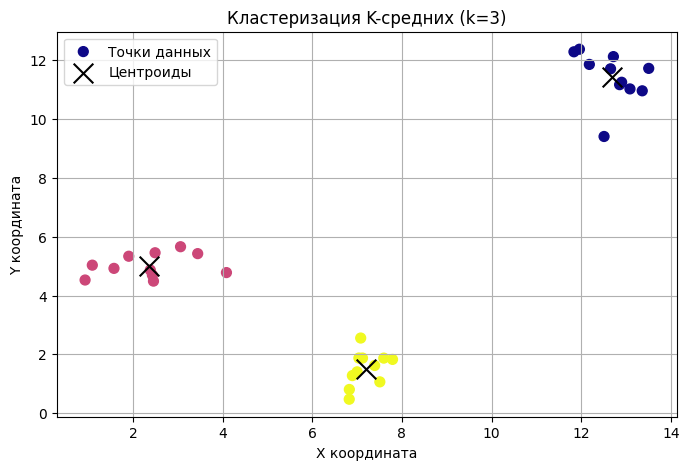

In [8]:
def plot_clusters_with_centroids(data, labels, centroids):
    plt.figure(figsize=(8, 5))
    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='plasma', s=50, label='Точки данных')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='x', s=200, label='Центроиды')
    plt.title(f'Кластеризация K-средних (k={optimal_clusters})')
    plt.xlabel('X координата')
    plt.ylabel('Y координата')
    plt.grid(True)
    plt.legend()
    plt.show()

plot_clusters_with_centroids(data, labels, centroids)


Визуализация для разных значений random_state

In [9]:
def plot_with_different_random_states(data, num_clusters, random_states):
    fig, axes = plt.subplots(1, len(random_states), figsize=(18, 5))

    for idx, random_state in enumerate(random_states):
        kmeans = KMeans(n_clusters=num_clusters, random_state=random_state)
        kmeans.fit(data)
        labels = kmeans.labels_
        centroids = kmeans.cluster_centers_

        axes[idx].scatter(data[:, 0], data[:, 1], c=labels, cmap='plasma', s=50)
        axes[idx].scatter(centroids[:, 0], centroids[:, 1], c='black', marker='x', s=200)
        axes[idx].set_title(f'random_state = {random_state}')
        axes[idx].set_xlabel('X координата')
        axes[idx].set_ylabel('Y координата')
        axes[idx].grid(True)

    plt.tight_layout()
    plt.show()

Пример для random_state = 10, 30, 50

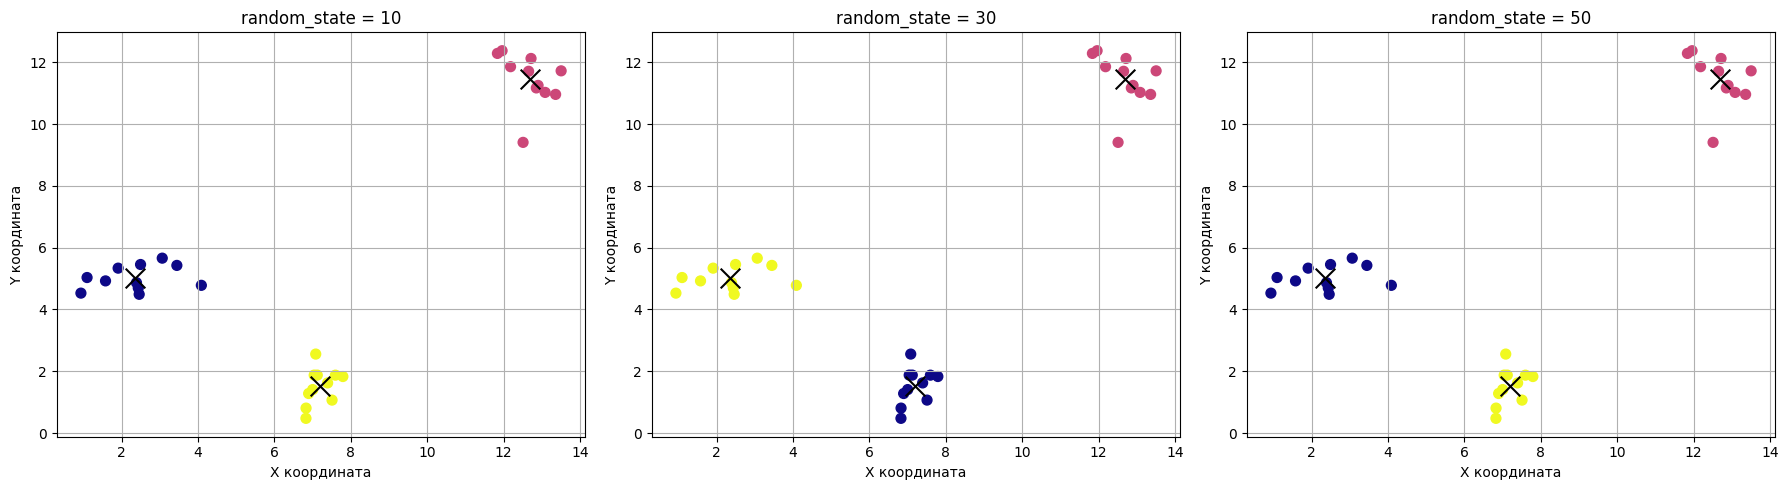

In [10]:
plot_with_different_random_states(data, num_clusters=optimal_clusters, random_states=[10, 30, 50])